In [1]:
!pip install tensorflow scikit-learn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tenso

In [2]:
!pip install scikeras

In [3]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Read the CSV file into a DataFrame
data = pd.read_csv("Alphabets_data.csv")
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
# Quick dataset overview and basic EDA
print("Shape of dataset:", data.shape)
print("\nDataFrame info:")
print(data.info())

print("\nMissing value counts per column:")
print(data.isnull().sum())

Shape of dataset: (20000, 17)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None

Missing value counts per column:
letter    0
xbox      0
ybox      0
width     0
height    0
onpix     

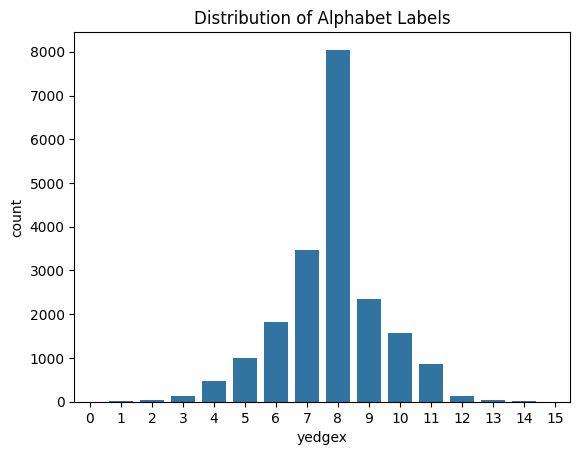

In [7]:
# Show distribution of the target column (last column assumed to be label)
sns.countplot(x=data.iloc[:, -1])
plt.title("Distribution of Alphabet Labels")
plt.show()

In [8]:
# Prepare features and target for modelling
features = data.drop("letter", axis=1).values
labels = data["letter"].values

In [9]:
# Encode textual labels to integers (A,B,C... -> 0,1,2...)
label_enc = LabelEncoder()
labels_encoded = label_enc.fit_transform(labels)

In [10]:
# Scale numeric features to zero-mean unit-variance
scaler_obj = StandardScaler()
features_scaled = scaler_obj.fit_transform(features)

In [11]:
# Stratified train-test split to preserve class proportions
X_tr, X_te, y_tr, y_te = train_test_split(
    features_scaled, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

In [12]:
data.dtypes

,0
letter,object
xbox,int64
ybox,int64
width,int64
height,int64
onpix,int64
xbar,int64
ybar,int64
x2bar,int64
y2bar,int64


In [13]:
# Define a function that constructs the neural network architecture.
# This will be used by the scikit-learn wrapper for hyperparameter search.
def build_network(hidden_layers=1, neurons=32, activation='relu', learning_rate=0.001):
    """
    Build and compile a simple feedforward neural network.
    - hidden_layers: number of Dense layers (excluding output)
    - neurons: units per hidden Dense layer
    - activation: activation function for hidden layers
    - learning_rate: optimizer learning rate
    """
    net = Sequential()
    net.add(Dense(neurons, input_dim=X_tr.shape[1], activation=activation))
    for _ in range(hidden_layers - 1):
        net.add(Dense(neurons, activation=activation))
    net.add(Dense(len(np.unique(y_tr)), activation='softmax'))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
    net.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return net

In [14]:
# Train a baseline network (single hidden layer, 32 units)
base_net = build_network()
hist_base = base_net.fit(X_tr, y_tr, validation_split=0.2, epochs=30, batch_size=32, verbose=0)

# Evaluate baseline on the hold-out test set
loss_base, acc_base = base_net.evaluate(X_te, y_te, verbose=0)
print("Baseline Model Test Accuracy:", acc_base)

# Obtain predicted class indices for the baseline model
y_pred_base = np.argmax(base_net.predict(X_te), axis=-1)
print("\nBaseline Classification Report:")
print(classification_report(y_te, y_pred_base))

Baseline Model Test Accuracy: 0.878000020980835
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Baseline Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       158
           1       0.78      0.88      0.83       153
           2       0.86      0.94      0.90       147
           3       0.82      0.89      0.86       161
           4       0.85      0.84      0.85       154
           5       0.83      0.81      0.82       155
           6       0.85      0.79      0.82       155
           7       0.80      0.78      0.79       147
           8       0.92      0.81      0.86       151
           9       0.94      0.89      0.91       149
          10       0.86      0.84      0.85       148
          11       0.92      0.93      0.93       152
          12       0.95      0.92      0.94       158
          13       0.94      0.87      0.90       157
          14       0.87      0.86      0.87       150
          15 

In [15]:
# Configure scikeras wrapper and randomized search for hyperparameter tuning
sk_model = KerasClassifier(model=build_network, verbose=0)

param_distribution = {
    'model__hidden_layers': [1, 2, 3],
    'model__neurons': [32, 64, 128],
    'model__activation': ['relu', 'tanh'],
    'model__learning_rate': [0.01, 0.001],
    'batch_size': [32, 64],
    'epochs': [30]
}

rand_search = RandomizedSearchCV(estimator=sk_model, param_distributions=param_distribution, n_iter=5, cv=3, verbose=1)
search_results = rand_search.fit(X_tr, y_tr)

# Display the best hyperparameters found
print("\nOptimal hyperparameters from RandomizedSearchCV:")
print(search_results.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits

Optimal hyperparameters from RandomizedSearchCV:
{'model__neurons': 128, 'model__learning_rate': 0.001, 'model__hidden_layers': 2, 'model__activation': 'tanh', 'epochs': 30, 'batch_size': 32}


In [16]:
# Ensure the wrapper is configured for classification outputs (returns labels)
sk_model_classify = KerasClassifier(model=build_network, verbose=0, classification=True)

In [17]:
# Evaluate the best estimator returned by the search on the test set
best_wrapper = search_results.best_estimator_
y_pred_tuned = best_wrapper.predict(X_te)
acc_tuned = accuracy_score(y_te, y_pred_tuned)

print("\n=== Tuned Model Performance ===")
print("Tuned Model Test Accuracy:", acc_tuned)
print("\nTuned Model Classification Report:")
print(classification_report(y_te, y_pred_tuned))


=== Tuned Model Performance ===
Tuned Model Test Accuracy: 0.9665

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       158
           1       0.95      0.93      0.94       153
           2       0.95      0.99      0.97       147
           3       0.95      0.99      0.97       161
           4       0.95      0.96      0.96       154
           5       0.93      0.96      0.94       155
           6       0.97      0.94      0.95       155
           7       0.92      0.92      0.92       147
           8       0.96      0.93      0.95       151
           9       0.98      0.95      0.96       149
          10       0.96      0.97      0.97       148
          11       0.98      0.97      0.97       152
          12       0.99      0.99      0.99       158
          13       0.99      0.94      0.96       157
          14       0.93      0.96      0.94       150
          15       0.99      0.9

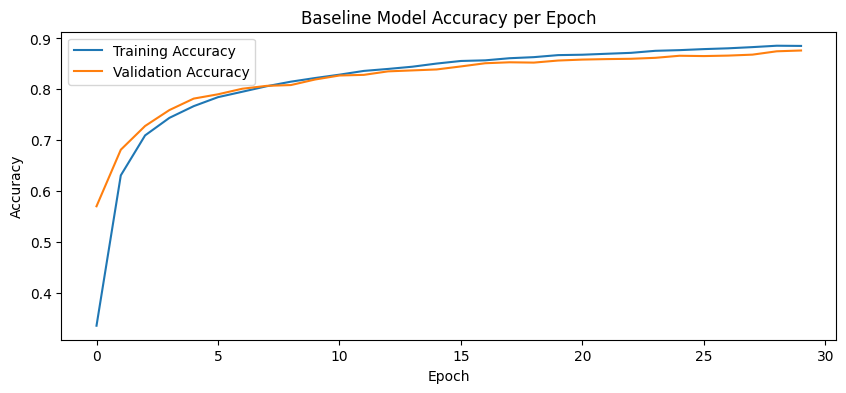

In [18]:
# Plot training vs validation accuracy for the baseline run
plt.figure(figsize=(10, 4))
plt.plot(hist_base.history['accuracy'], label='Training Accuracy')
plt.plot(hist_base.history['val_accuracy'], label='Validation Accuracy')
plt.title("Baseline Model Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
# Re-train baseline once more (to show consistent reporting as in original flow)
base_net = build_network()
hist_base2 = base_net.fit(
    X_tr, y_tr,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=0
)
loss_base2, acc_base2 = base_net.evaluate(X_te, y_te, verbose=0)
y_pred_base2 = np.argmax(base_net.predict(X_te), axis=-1)

print("\n=== Baseline (Re-trained) ===")
print("Test Accuracy:", acc_base2)
print(classification_report(y_te, y_pred_base2))

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

=== Baseline (Re-trained) ===
Test Accuracy: 0.8707500100135803
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       158
           1       0.77      0.87      0.82       153
           2       0.84      0.91      0.88       147
           3       0.88      0.89      0.88       161
           4       0.83      0.83      0.83       154
           5       0.87      0.75      0.80       155
           6       0.82      0.81      0.82       155
           7       0.83      0.75      0.79       147
           8       0.94      0.81      0.87       151
           9       0.91      0.93      0.92       149
          10       0.89      0.86      0.87       148
          11       0.89      0.88      0.89       152
          12       0.89      0.92      0.91       158
          13       0.89      0.84      0.87       157
          14       0.90      0.85      0.87       150
          15       0.88      

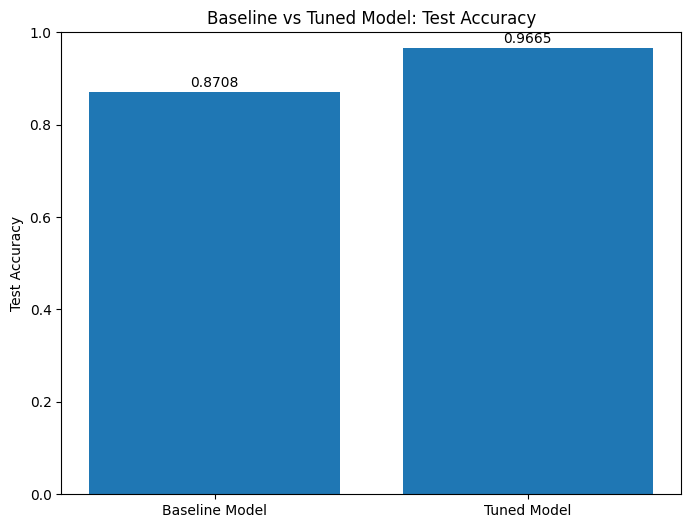

In [21]:
# Visual comparison of baseline vs tuned accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Baseline Model', 'Tuned Model'], [acc_base2, acc_tuned])
plt.ylabel("Test Accuracy")
plt.title("Baseline vs Tuned Model: Test Accuracy")
plt.ylim(0, 1)
for i, v in enumerate([acc_base2, acc_tuned]):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.show()


In [22]:
# Summary of observed performance
summary = """
Performance Summary:
--------------------
1. Baseline network (1 hidden layer, 32 units, ReLU) achieved a test accuracy of {:.2f}%.
2. The tuned network, found by RandomizedSearchCV, reached a test accuracy of {:.2f}%.
3. Hyperparameter optimization improved generalization, likely due to:
   - Adjusted network depth/width
   - Different activation choice
   - More suitable learning rate
4. Tuning requires extra compute but yielded measurable gains in accuracy.
5. The classification reports indicate better precision/recall for many classes after tuning.

Conclusion:
-----------
For alphabet recognition, methodical hyperparameter tuning of an ANN produces better test performance than the untuned baseline.
""".format(acc_base2 * 100, acc_tuned * 100)

print(summary)


Performance Summary:
--------------------
1. Baseline network (1 hidden layer, 32 units, ReLU) achieved a test accuracy of 87.08%.
2. The tuned network, found by RandomizedSearchCV, reached a test accuracy of 96.65%.
3. Hyperparameter optimization improved generalization, likely due to:
   - Adjusted network depth/width
   - Different activation choice
   - More suitable learning rate
4. Tuning requires extra compute but yielded measurable gains in accuracy.
5. The classification reports indicate better precision/recall for many classes after tuning.

Conclusion:
-----------
For alphabet recognition, methodical hyperparameter tuning of an ANN produces better test performance than the untuned baseline.

